# Henon Heiles

This Jupyter Notebook contains the essential code used in the paper "Detection of periodic orbits in Hamiltonian systems using Lagrangian Descriptors". All code was written and executed in Python 2.7

First import the necessary modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint,quad,trapz
import math

Begin by plotting the contour of the Henon-Heiles potential at input values. The potential is given by:

$$ V(x,y) = \frac{1}{2}(x^2 + y^2) + x^2 y - \frac{y^3}{3} $$


In [2]:
def potential(x,y):
    return 0.5*(x**2+y**2)+(x**2)*y-(1.0/3.0)*(y**3)

def HH_Contour(V):
    """
    type V : List[float]
    """
    x=np.linspace(-2.0,2.0,200)
    y=np.linspace(-2.0,2.0,200)
    X,Y=np.meshgrid(x,y)
    Z=np.zeros((200,200))
    for i in range(200):
        for j in range(200):
            Z[i,j]=potential(X[i,j],Y[i,j])
    plt.figure(figsize=(12,12))
    plt.contour(X,Y,Z,V)
    plt.show()

Notice that for V < $\frac{1}{6}$ the motion is bounded, while for V > $\frac{1}{6}$ the trajectories escape to infinity.

The Henon-Heiles Hamiltonian is:


$$ H(x,y,p_{x},p_{y})=\frac{1}{2}(p_{x}^{2}+p_{y}^2) + V(x,y)$$

Since the system is autonomous, it follows that $H$ is conserved. Creating an LD color plot usually involves 2 functions: one which computes the LD for a given pair of initial conditions and value of energy, and another which creates the plot itself by dividing the 2D grid into "cells" of initial conditions and recording the value of the former function for each cell. 


Consider the linearized Henon-Heiles around equilibrum $(0,1,0,0)$. By analizing the eigenvalues of the linear system matrix, it can be analitically concluded that $(x,p_{x})$ is the center manifold and $(Y,p_{Y})$ is the saddle space ($Y:=y-1$). As shown in the paper, the $(Y,p_{Y})$ LD plot will attain minimum at coordinates $(0,0)$ for every $h>1/6$.

The code segment below creates a plot of LD for the nonlinear system in the $(y,p_{y})$ plane at fixed energy:

In [6]:
def compute_LD_1(y0,py_0,x0,h,tau):
    def HH(fun,t):
        x,y,px,py=fun
        derivative=[px,py,-x-2*x*y,-x**2-y+y**2]
        return derivative
    px_0=math.sqrt(2*h-py_0**2-2*V(x0,y0))
    IC=[x0,y0,px_0,py_0]
    t1=np.linspace(0,-tau,100*tau)
    sol1=odeint(HH, IC, t1)
    t2=np.linspace(0,tau,100*tau)
    sol2=odeint(HH, IC, t2)
    sol1=sol1[::-1]
    sol=np.vstack((sol1,sol2))
    t1=t1[::-1] 
    t=np.hstack((t1,t2)) 
    integrand=[]
    for i in range(200*tau):
        integrand.append(math.sqrt(abs(sol[:,2][i]))+math.sqrt(abs(sol[:,3][i]))+math.sqrt(abs(sol[:,0][i]+2*sol[:,0][i]*sol[:,1][i]))+math.sqrt(abs(sol[:,0][i]**2+sol[:,1][i]-sol[:,1][i]**2)))
    return trapz(integrand,t)

def PLOT_1(h,x0,tau):
    y=np.linspace(-0.45,0.55,600)
    py=np.linspace(-0.45,0.45,600) #Plots at different energies usually have distinct limits of axes.
    Y,PY=np.meshgrid(y,py)
    Z=np.zeros((600,600))
    for i in range(600):
        for j in range(600):
            try:
                Z[i,j]=compute_LD_1(Y[i,j], PY[i,j], x0, h, tau)
            except ValueError:
                Y[i,j]=np.nan
                PY[i,j]=np.nan
    plt.figure(figsize=(12,12))
    CM=plt.pcolormesh(Y,PY,Z)
    plt.colorbar(CM) 
    plt.xlim(y[0],y[-1])
    plt.ylim(py[0],py[-1])
    plt.xlabel('y')
    plt.ylabel('py')
    plt.show()

The LD plot for the linearized system is coded analogously, the only change is in the definition of the function defining the system of ODEs, $p_{x_{0}}$ and $\texttt{integrand}$.

In [ ]:
def linear_HH(fun,t):
    x,y,px,py=fun
    derivative=[px,py,-3*x,y-1]
    return derivative

px_0=math.sqrt(2*h-py_0**2-3*(x0**2)+(y0-1)**2-(1.0/3.0))

In [ ]:
for i in range(200*tau):
    integrand.append(math.sqrt(abs(sol[:,2][i]))+math.sqrt(abs(sol[:,3][i]))+math.sqrt(3*abs(sol[:,0][i]))+math.sqrt(abs(sol[:,1][i]-1)))
return trapz(integrand,t)

$\texttt{PLOT_1}$ plots the LD on a grid $(y,p_{y})$ of initial conditions by taking a slice $x_{0}$ of the phase space, with variable $p_{x}$ computed from the conservation of Hamiltonian. The Henon-Heiles equations are integrated using the $\texttt{odeint}$ function with time step 0.01. To avoid inacurracies, function $\texttt{odeint}$ is called separately for intervals $[0,-\tau]$ and $[0,\tau]$. The two resulting $(100*tau) \times 4$ matrices are combined using $\texttt{np.vstack}$. For $h>1/6$ many trajectories escape to infinity, hence it is possible to select a color scale with $\texttt{plt.clim}(min,max)$, where $min$ and $max$ are chosen such that the phase space structure is as clear as possible. Any numerical value above $max$ will be dark red and any value below $min$ will be dark blue.

For $H<1/6$ and $\tau$ sufficiently large the output of $\texttt{PLOT_1}$ is similar to surfaces of section, yet the fate of trajectories was not analyzed. This result highlights the advantage of Lagrangian Descriptors: while surfaces of section require a determination of whether a certain trajectory will ever return to the section, the LD only requires computation of solutions under given initial conditions.

As an example, figure below represents the output of $\texttt{PLOT_1}$ for $H=1/12$ and $x_{0}=0$, with $\tau=50$.

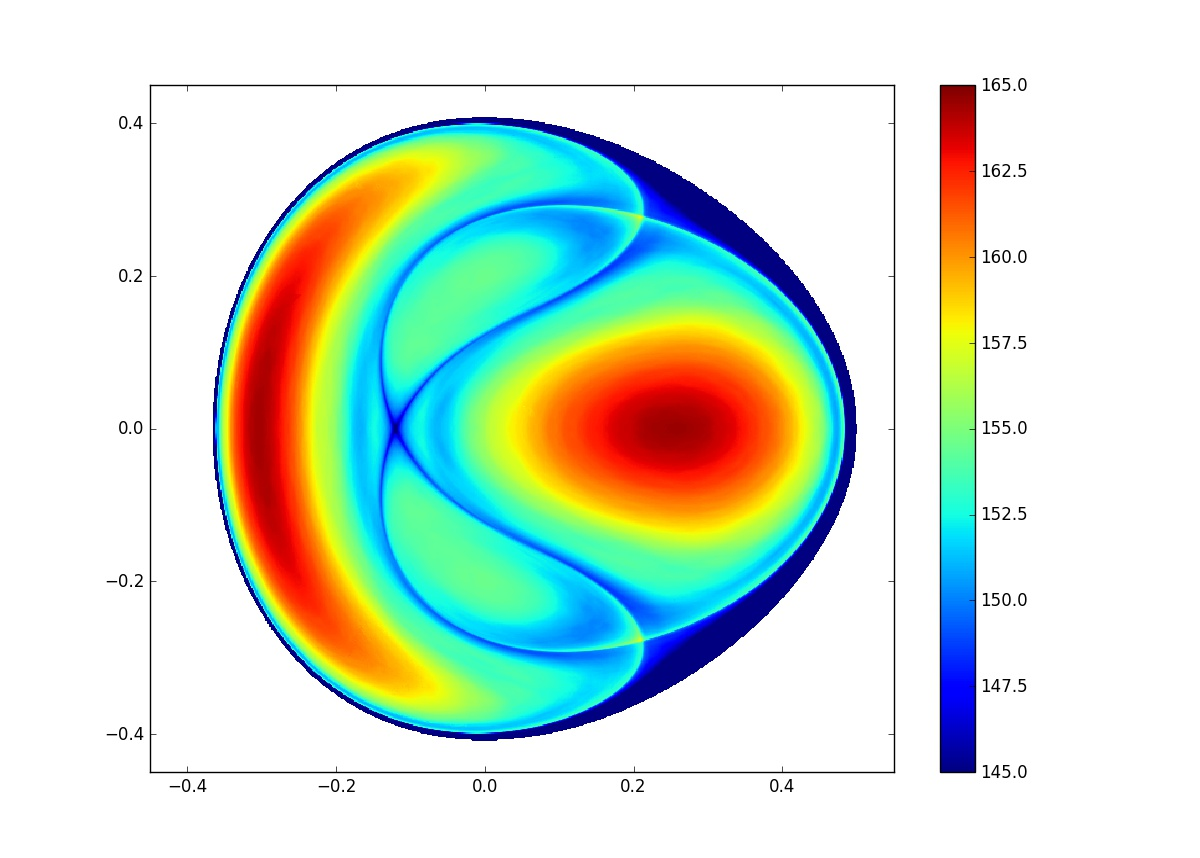

For $h>1/6$ the $(y,p_{y})$ plane represents the saddle-space. The figure below shows the output for $h=0.17$ and $x_{0}=0$, with $\tau=5$.


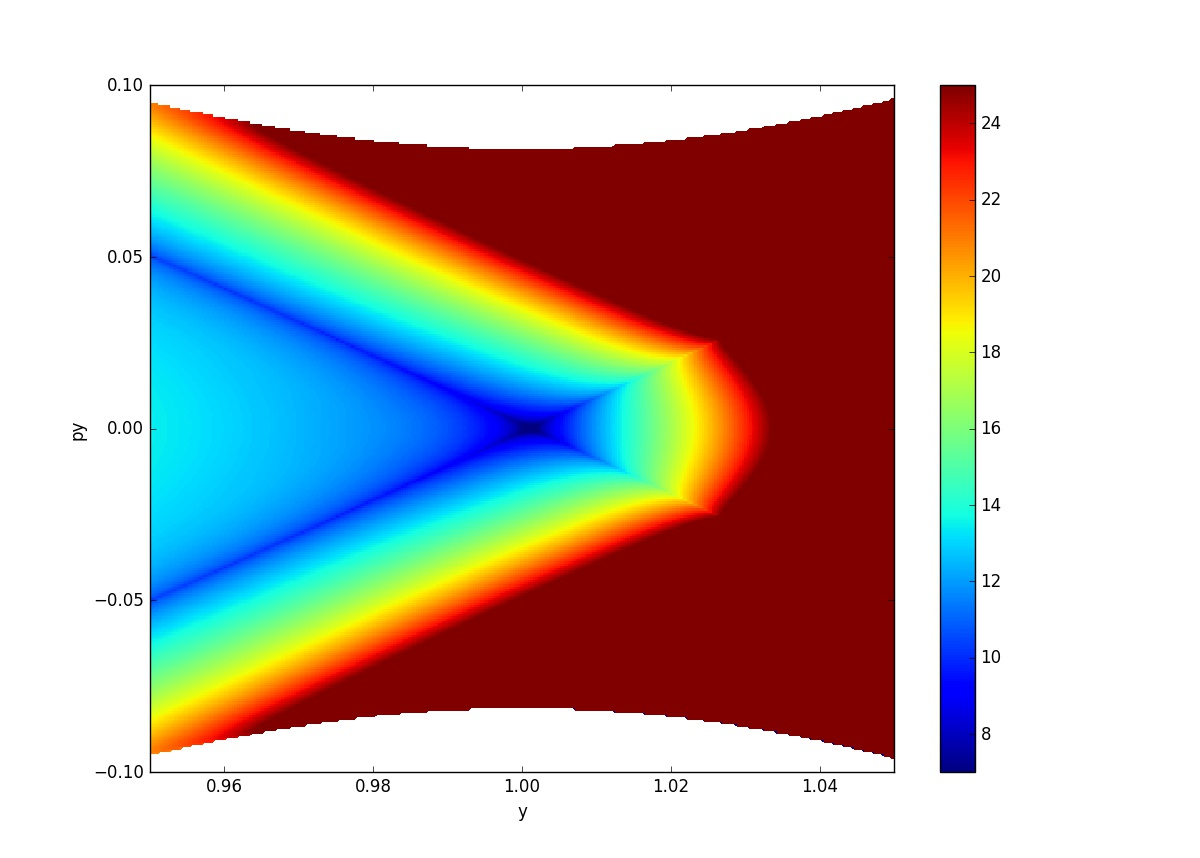


For the nonlinear system, as the Hamiltonian increases, the minimum (always located at the intersection of stable and unstable manifolds) will move away from $(1,0)$. Furthermore, as $\tau$ is increased, the above structure becomes fractal:



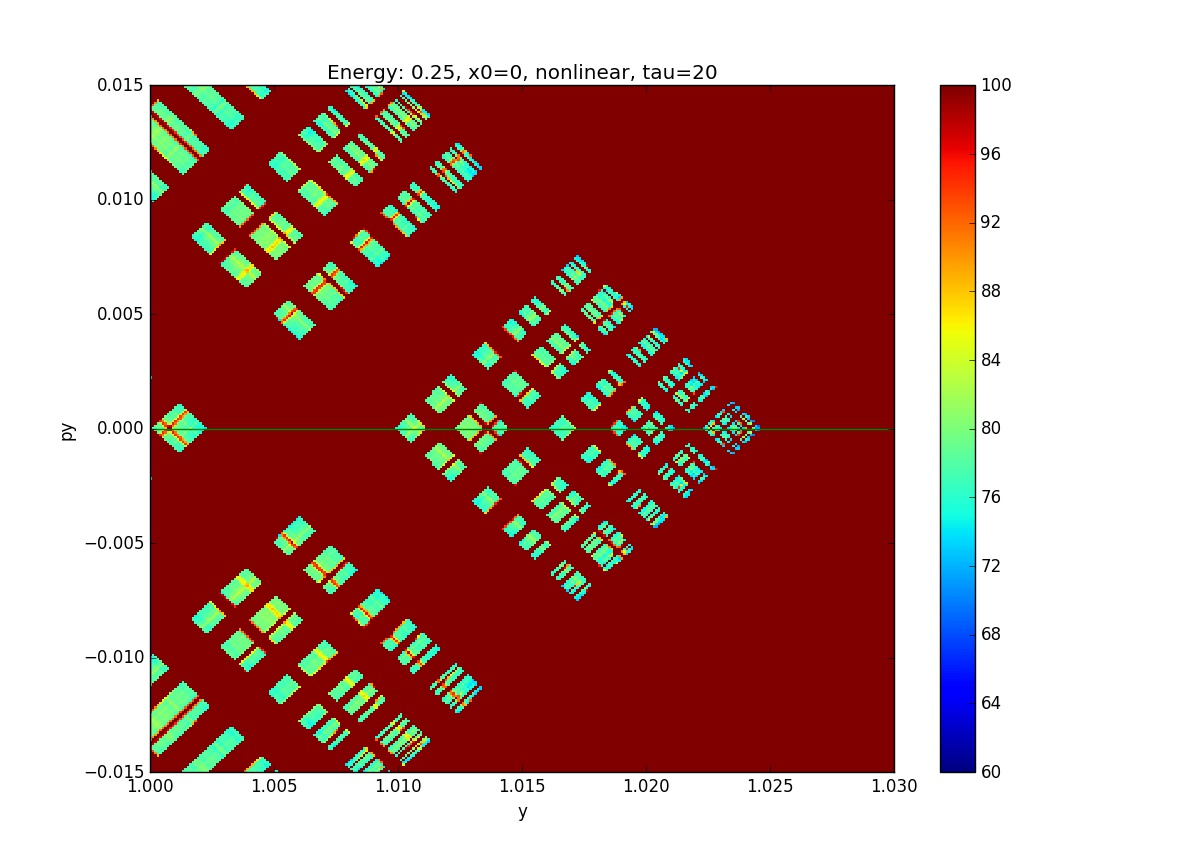

As described in the paper, location of Lyapunov orbits for fixed energy is computed by determining the coordinates of minimum of LD in plots such as the one above. Nevertheless, this raises a complexity issue: if the number of cells in every row and column of the grid is $n$, then the grid can be viewed as a $n\times n$ matrix. Since computation of minimum requires transversing each element of the matrix at least once, it follows that computational complexity is $\mathcal{O}(n^2)$.

Henon-Heiles system is extremely sensitive to initial conditions, therefore a high resolution grid is required in order to accurately determine the coordinates of minimun. The function $\texttt{min_search}$ shown below works as follows:

-Consider a square a grid of initial condition $(y,p_{y})$ centered at $(1,0)$.

-Locate the minimum of LD.

-"Trim" the sides of the square grid to form a new square with sides of half length than previous ones, centered around the coordinates of minimum.

-Search for minimum in the new grid.

In [9]:
def min_search(h,x0,tau):
    """
    Attempts to improve accuracy of minimum coordinates, for h>1/6.
    Assumes coordinates of minimum are in the neighbourhood of (1,0)
    """
    y_min,y_max=0.98,1.02
    py_min,py_max=-0.02,0.02
    for _ in range(15):   # 15 iterations yielded very accurate results.
        if k in [0,1]:
            size=200
        else:
            size=100
        y=np.linspace(y_min,y_max,size)
        py=np.linspace(py_min,py_max,size)
        Y,PY=np.meshgrid(y,py)
        Z=np.zeros((size,size))
        for i in range(size):
            for j in range(size):
                try:
                    Z[i,j]=compute_LD_1(Y[i,j],PY[i,j],x0,h,tau)
                except ValueError:
                    Y[i,j]=np.nan
                    PY[i,j]=np.nan
        indices=np.where(Z==np.amin(Z)) # np.amin(Z) returns minimum element of array Z
        y_length=y_max-y_min
        py_length=py_max-py_min
        y_min=Y[indices[0][0],indices[1][0]]-y_length/4.0  # reduces search area
        y_max=Y[indices[0][0],indices[1][0]]+y_length/4.0
        py_min=PY[indices[0][0],indices[1][0]]-py_length/4.0
        py_max=PY[indices[0][0],indices[1][0]]+py_length/4.0
    return 'LD attains minimum along line y=' + str(Y[indices[0][0],indices[1][0]]), 'LD attains minimum along line py=' + str(PY[indices[0][0],indices[1][0]])

For $x_{0}=0$ quadratic complexity can be avoided by noting the minimum is located on line $p_{y_{0}}=0$, hence complexity of the search problem reduces to $\mathcal{O}(n)$.

In [ ]:
def line_min_search(h,tau):
    """
    Returns y0 coordinate of minimum of LD. Assumes x0=0 and
    py_0 coordinate of minimum will be 0.
    """
    y_min,y_max=1.0,1.03
    for _ in range(4):
        y=np.linspace(y_min,y_max,10001)
        z=np.zeros((10001,))
        for i in range(10001):
            z[i]=compute_LD_1(y[i,j],0,0,h,tau)
        index=np.where(z==np.amin(z))
        y_length=y_max-y_min
        y_min=Y[index[0][0]]-y_length/16.0
        y_max=Y[index[0][0]]+y_length/16.0
    return 'LD reaches minimum at y= '+str(y[index[0][0]])

Function $\texttt{energy_level}$ creates an LD plot in the $(y,h)$ plane. For each energy $h$, it plots the LD for an array of $y_{0}$ of initial conditions. It assumes $x_{0}=0$ (hence $p_{y_{0}}$=0). As $\tau$ increases, more and more trajectories escape to infinity (thus higher resolution is necessary) and location of Lyapunov orbits becomes clearer.

In [ ]:
def energy_level(tau):
    """
    Assumes x0=0, hence coordinate py_0 of minimum will be 0.
    """
    h=np.linspace(0.18,0.35,601)
    y=np.linspace(0.85,1.10,601)
    Y,H=np.meshgrid(y,h)
    Z=np.zeros((601,601))
    for i in range(601):
        for j in range(601):
            try:
                Z[i,j]=compute_LD_1(y[i,j],0,0,h,tau)
            except ValueError:
                Y[i,j]=np.nan
                PY[i,j]=np.nan
    plt.figure(figsize=(12,10))
    CM=plt.pcolormesh(Y,H,Z)
    plt.colorbar(CM)
    plt.clim(40,90)
    plt.xlim(y[0],y[-1])
    plt.ylim(h[0],h[-1])
    plt.xlabel('y')
    plt.ylabel('h')
    plt.show()

Below is the output of $\texttt{energy_level}(15)$:

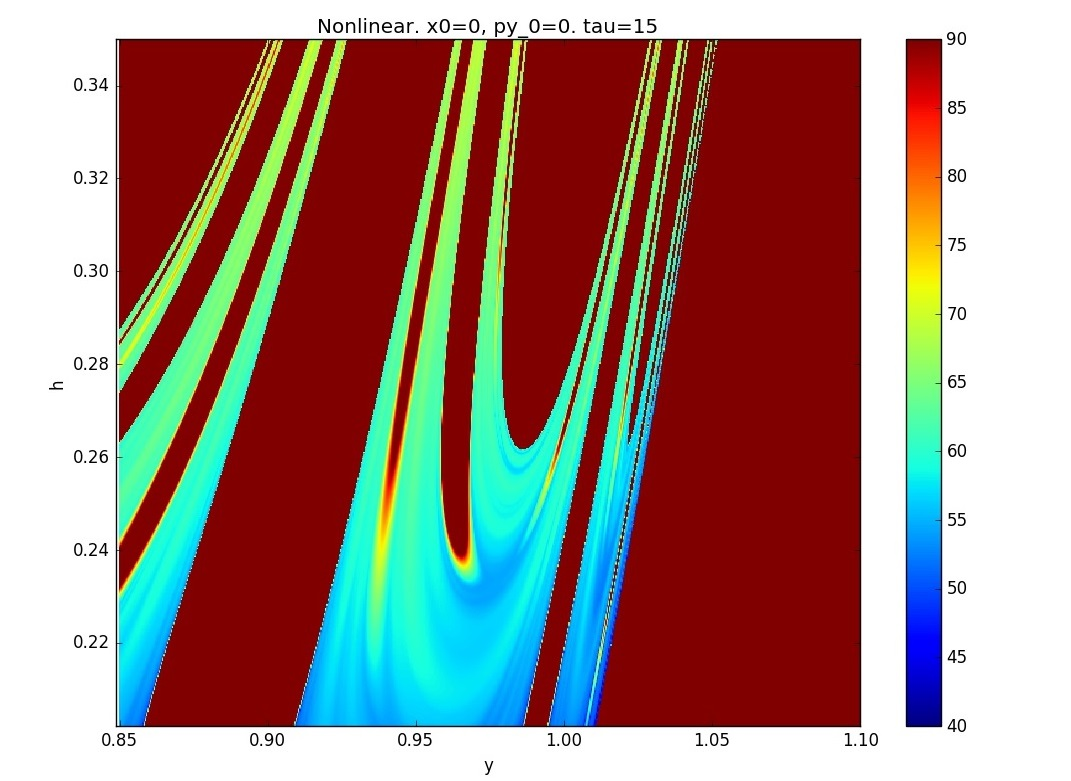

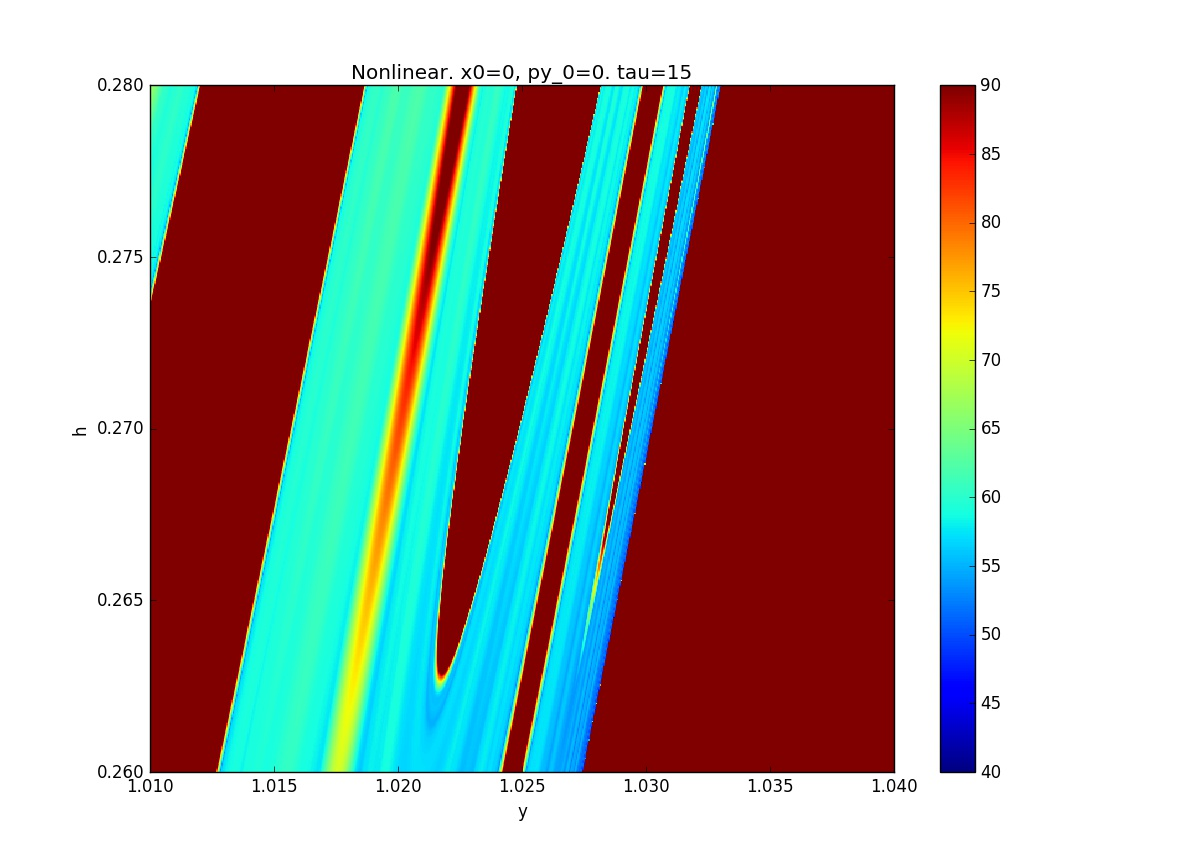